In [1]:
library(tidyverse)
library(Seurat)
library(Signac)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Loading required package: SeuratObject

Loading required package: sp


Attaching package: ‘SeuratObject’


The following objects are masked from ‘package:base’:

    intersect, t




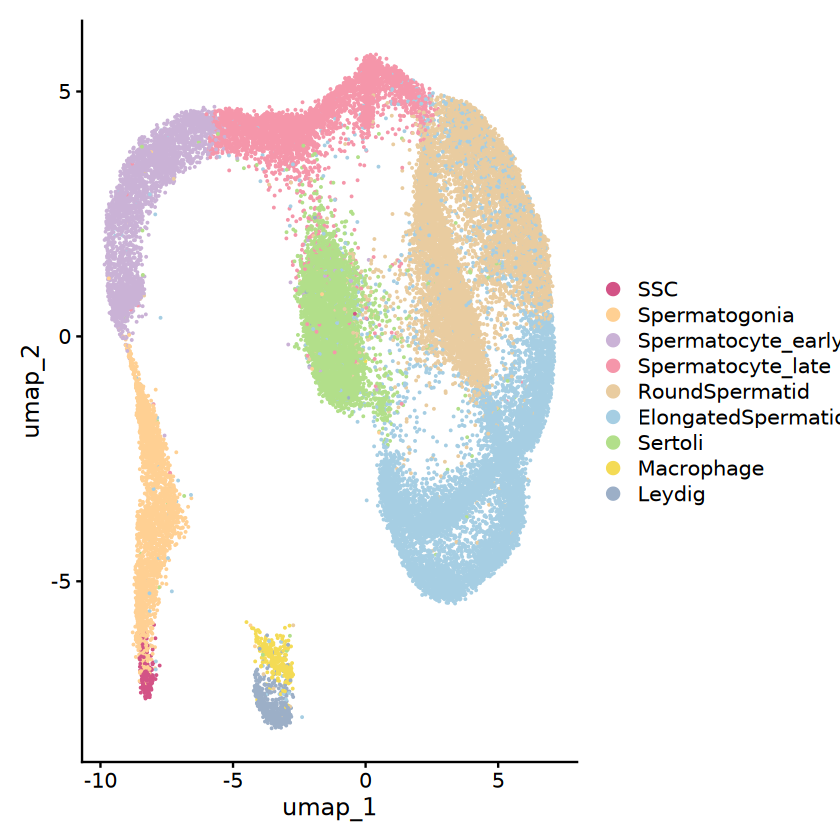

In [2]:
atac <- readRDS("..//b3-注释-AddMotif-20240421/ScATAC-anno-mtf.chrom.tf-20240422.Rds")

mycolor<-c('#D35386' , '#FFD093' , '#CAB2D6' , '#F596AA' , '#E9CCA0' , '#A6CEE3' , '#B2DF8A' , '#F4DB55', '#9CAFC7')

DimPlot(atac)+scale_color_manual(values=mycolor)

In [3]:
atac

An object of class Seurat 
132942 features across 34794 samples within 4 assays 
Active assay: peaks (109629 features, 109629 variable features)
 2 layers present: counts, data
 3 other assays present: chromvar, RNA, TFs
 2 dimensional reductions calculated: lsi, umap

In [4]:
names(atac@meta.data)

[1] "orig.ident"                       "nCount_peaks"                    
 [3] "nFeature_peaks"                   "total"                           
 [5] "duplicate"                        "chimeric"                        
 [7] "unmapped"                         "lowmapq"                         
 [9] "mitochondrial"                    "nonprimary"                      
[11] "passed_filters"                   "is__cell_barcode"                
[13] "excluded_reason"                  "TSS_fragments"                   
[15] "DNase_sensitive_region_fragments" "enhancer_region_fragments"       
[17] "promoter_region_fragments"        "on_target_fragments"             
[19] "blacklist_region_fragments"       "peak_region_fragments"           
[21] "peak_region_cutsites"             "nucleosome_signal"               
[23] "nucleosome_percentile"            "TSS.enrichment"                  
[25] "TSS.percentile"                   "pct_reads_in_peaks"              
[27] "blacklist_ratio"                  "qc"                              
[29] "peaks_snn_res.0.8"                "seurat_clusters"                 
[31] "nCount_RNA"                       "nFeature_RNA"                    
[33] "celltype"                         "cluster.plot"                    
[35] "peaks_snn_res.0.01"               "peaks_snn_res.0.02"              
[37] "peaks_snn_res.0.04"               "peaks_snn_res.0.06"              
[39] "peaks_snn_res.0.08"               "peaks_snn_res.0.1"               
[41] "peaks_snn_res.0.2"                "peaks_snn_res.0.4"               
[43] "peaks_snn_res.0.6"                "peaks_snn_res.1"                 
[45] "celltype1"                        "group"                           
[47] "barcode"                          "celltype2"                       
[49] "celltype3"                        "celltype.group"                  
[51] "excluded"                         "... <- NULL"                     
[53] "cellgroup"                        "nCount_TFs"                      
[55] "nFeature_TFs"

In [ ]:
DepthCor(atac)
ggsave('qc_plot/DepthCor.pdf',height=6,width=6)

Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font width unknown for character 0x9”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“font width unknown for character 0x9”


In [7]:
atac$high.tss <- ifelse(atac$TSS.enrichment > 2, 'High', 'Low')

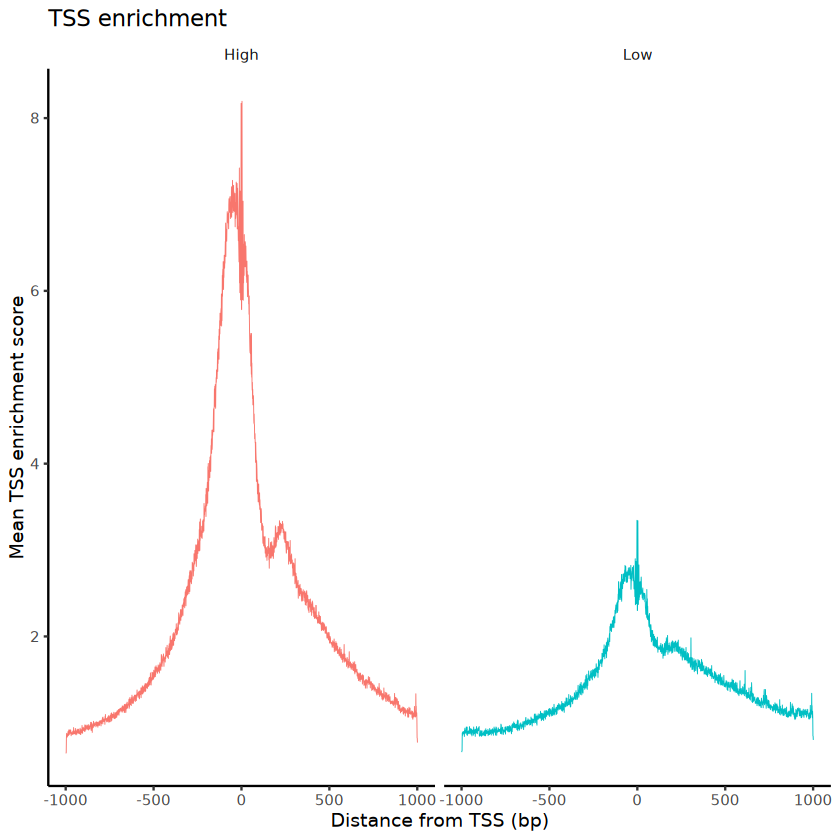

In [11]:
TSSPlot(atac, group.by = 'high.tss') + NoLegend()
ggsave('qc_plot/TSSPlot.pdf',height=6,width=9)

In [19]:
Idents(atac)=atac$orig.ident

Warning message in SingleExIPlot(type = type, data = data[, x, drop = FALSE], idents = idents, :
“All cells have the same value of blacklist_ratio.”


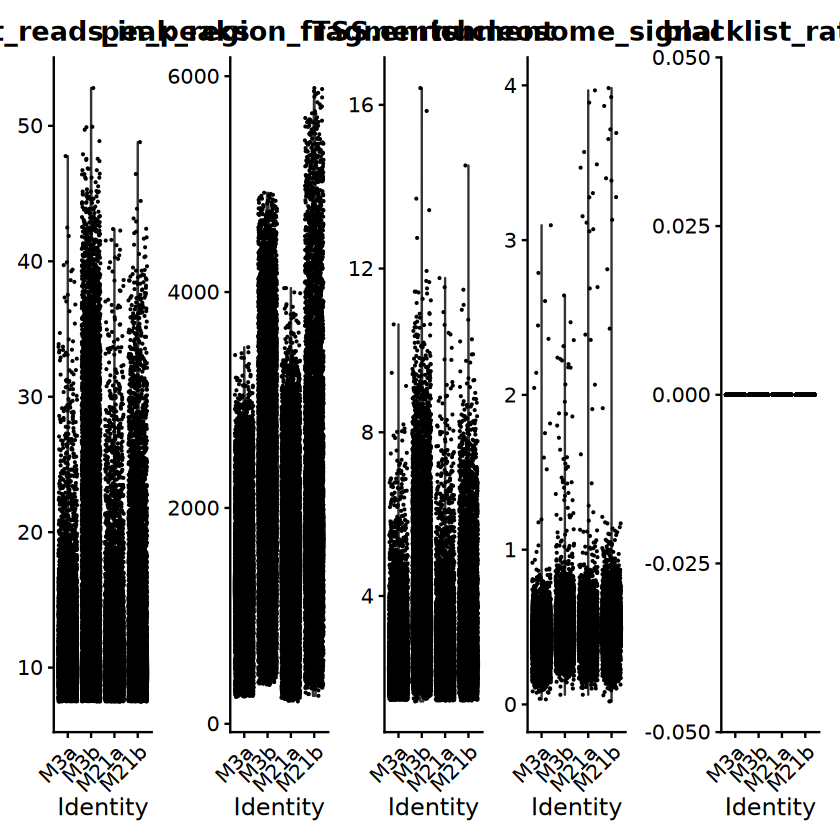

In [22]:
VlnPlot(
  object = atac,
  features = c('pct_reads_in_peaks', 'peak_region_fragments',
               'TSS.enrichment', 'nucleosome_signal', 'blacklist_ratio'),
  pt.size = 0.1,
  ncol = 5
)
ggsave('qc_plot/qc_var-VlnPlot.pdf',height=6,width=6*5)

In [27]:
atac@meta.data$log.TSS.enrichment=log2(atac@meta.data$TSS.enrichment)

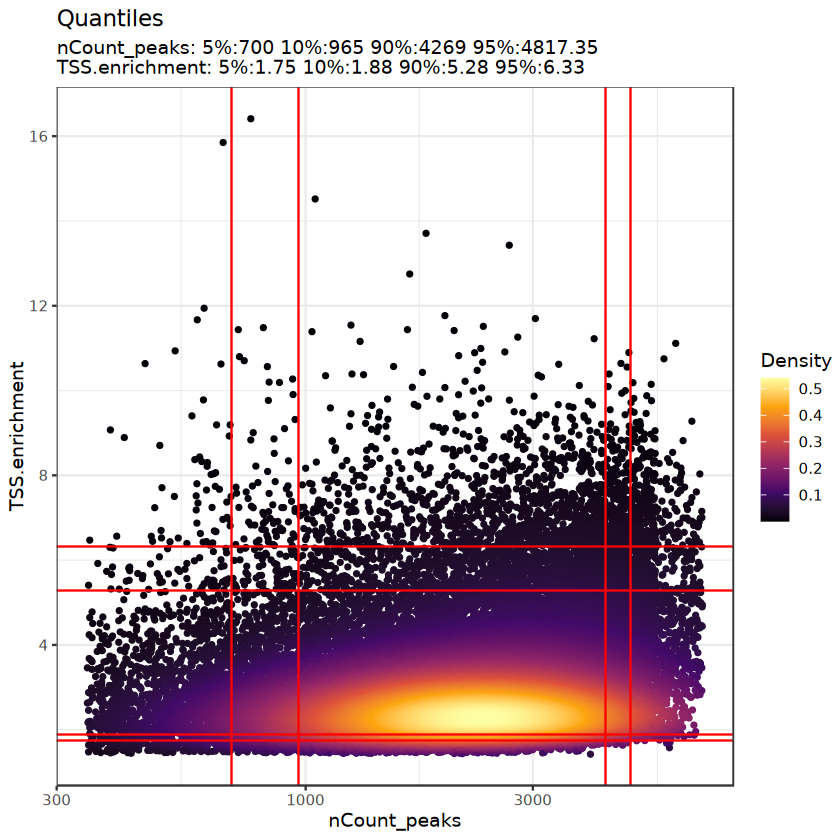

In [24]:
DensityScatter(atac, x = 'nCount_peaks', y = 'TSS.enrichment', log_x = TRUE, quantiles = TRUE)

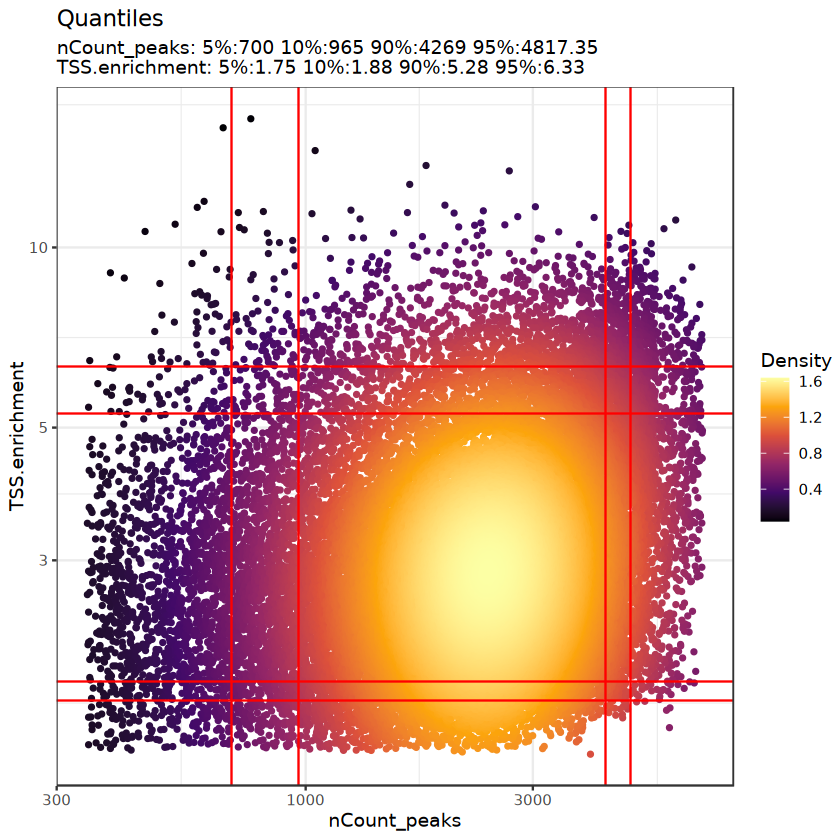

In [36]:
DensityScatter(atac, x = 'nCount_peaks', y = 'TSS.enrichment', log_x = TRUE, log_y = TRUE, quantiles = TRUE)
ggsave('qc_plot/nCount_peaks-TSS.enrichment-DensityScatter.pdf',height=6,width=6)

In [32]:
atac_m03=atac[,atac$group=='M3']
atac_m21=atac[,atac$group=='M21']

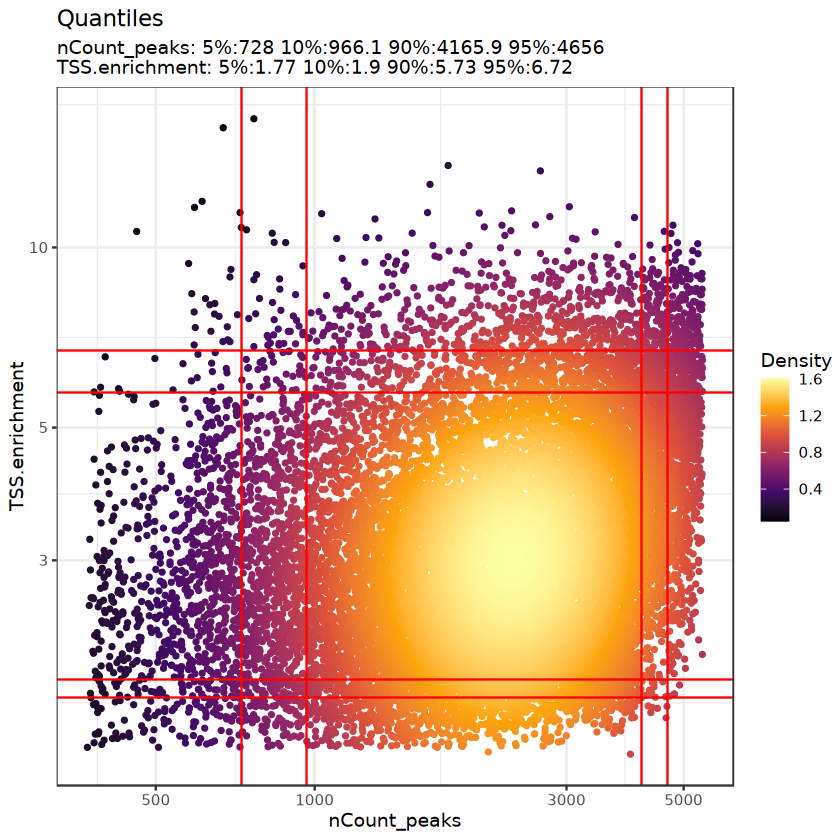

In [37]:
DensityScatter(atac_m03, x = 'nCount_peaks', y = 'TSS.enrichment', log_x = TRUE, log_y = TRUE, quantiles = TRUE)
ggsave('qc_plot/nCount_peaks-TSS.enrichment-DensityScatter-m03.pdf',height=6,width=6)

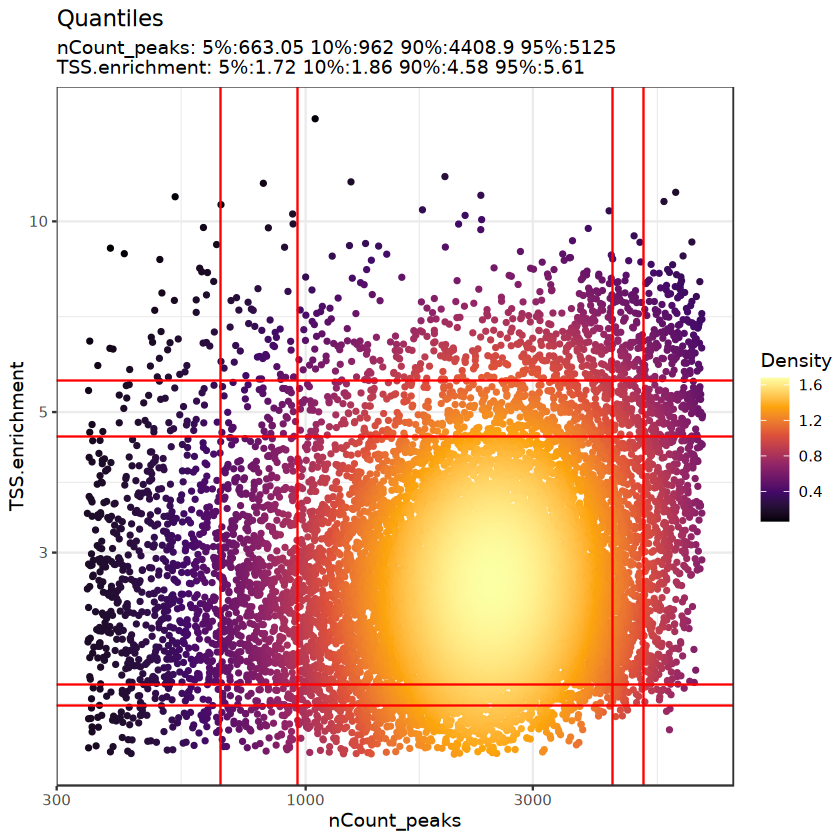

In [38]:
DensityScatter(atac_m21, x = 'nCount_peaks', y = 'TSS.enrichment', log_x = TRUE, log_y = TRUE, quantiles = TRUE)
ggsave('qc_plot/nCount_peaks-TSS.enrichment-DensityScatter-m21.pdf',height=6,width=6)

In [40]:
atac@meta.data |> names()

[1] "orig.ident"                       "nCount_peaks"                    
 [3] "nFeature_peaks"                   "total"                           
 [5] "duplicate"                        "chimeric"                        
 [7] "unmapped"                         "lowmapq"                         
 [9] "mitochondrial"                    "nonprimary"                      
[11] "passed_filters"                   "is__cell_barcode"                
[13] "excluded_reason"                  "TSS_fragments"                   
[15] "DNase_sensitive_region_fragments" "enhancer_region_fragments"       
[17] "promoter_region_fragments"        "on_target_fragments"             
[19] "blacklist_region_fragments"       "peak_region_fragments"           
[21] "peak_region_cutsites"             "nucleosome_signal"               
[23] "nucleosome_percentile"            "TSS.enrichment"                  
[25] "TSS.percentile"                   "pct_reads_in_peaks"              
[27] "blacklist_ratio"                  "qc"                              
[29] "peaks_snn_res.0.8"                "seurat_clusters"                 
[31] "nCount_RNA"                       "nFeature_RNA"                    
[33] "celltype"                         "cluster.plot"                    
[35] "peaks_snn_res.0.01"               "peaks_snn_res.0.02"              
[37] "peaks_snn_res.0.04"               "peaks_snn_res.0.06"              
[39] "peaks_snn_res.0.08"               "peaks_snn_res.0.1"               
[41] "peaks_snn_res.0.2"                "peaks_snn_res.0.4"               
[43] "peaks_snn_res.0.6"                "peaks_snn_res.1"                 
[45] "celltype1"                        "group"                           
[47] "barcode"                          "celltype2"                       
[49] "celltype3"                        "celltype.group"                  
[51] "excluded"                         "... <- NULL"                     
[53] "cellgroup"                        "nCount_TFs"                      
[55] "nFeature_TFs"                     "log.TSS.enrichment"

In [42]:
atac@meta.data$project = 'all'

In [43]:
Idents(atac)=atac$project

Warning message in SingleExIPlot(type = type, data = data[, x, drop = FALSE], idents = idents, :
“All cells have the same value of blacklist_ratio.”


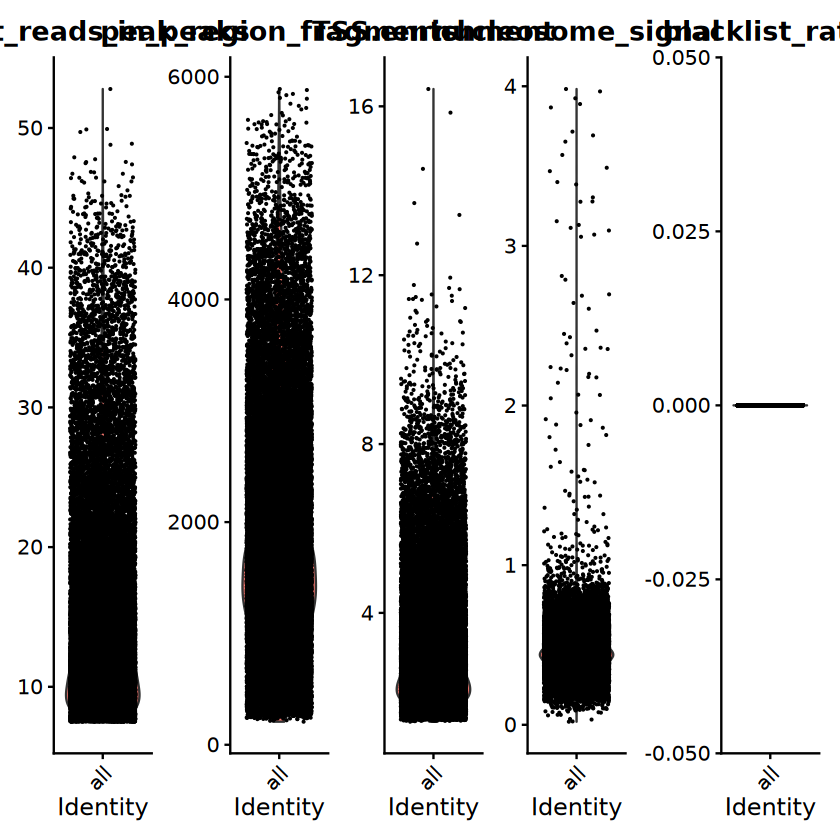

In [44]:
VlnPlot(
  object = atac,
  features = c('pct_reads_in_peaks', 'peak_region_fragments',
               'TSS.enrichment', 'nucleosome_signal', 'blacklist_ratio'),
  pt.size = 0.1,
  ncol = 5
)
ggsave('qc_plot/qc_var-VlnPlot-all.pdf',height=6,width=6*5)

Warning message in SingleExIPlot(type = type, data = data[, x, drop = FALSE], idents = idents, :
“All cells have the same value of blacklist_ratio.”


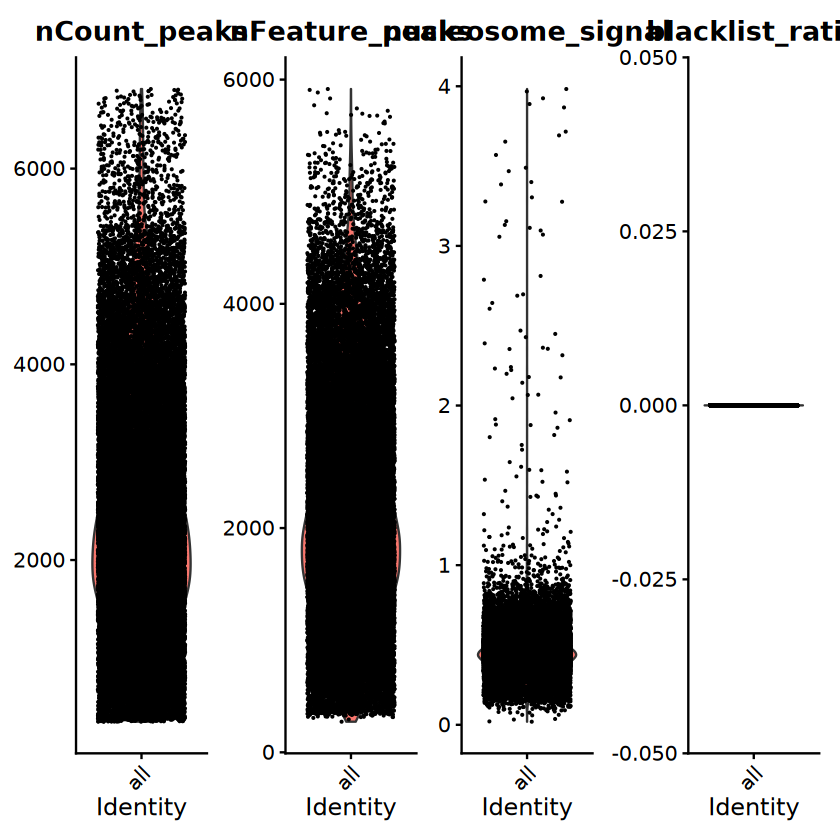

In [46]:
VlnPlot(
  object = atac,
  features = c('nCount_peaks', 'nFeature_peaks',
                'nucleosome_signal', 'blacklist_ratio'),
  pt.size = 0.1,
  ncol = 4
)
ggsave('qc_plot/qc_var-VlnPlot-all.pdf',height=6,width=6*4)